# Урок 3. Логистическая регрессия. Log Loss

In [222]:
import numpy as np
import matplotlib.pyplot as plt

In [223]:
X = np.array([ [   1,    1,  500,    1],
               [   1,    1,  700,    1],
               [   1,    2,  750,    2],
               [   1,    5,  600,    1],
               [   1,    3, 1450,    2],
               [   1,    0,  800,    1],
               [   1,    5, 1500,    3],
               [   1,   10, 2000,    3],
               [   1,    1,  450,    1],
               [   1,    2, 1000,    2]], dtype = np.float64)

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

In [224]:
X

array([[1.00e+00, 1.00e+00, 5.00e+02, 1.00e+00],
       [1.00e+00, 1.00e+00, 7.00e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 7.50e+02, 2.00e+00],
       [1.00e+00, 5.00e+00, 6.00e+02, 1.00e+00],
       [1.00e+00, 3.00e+00, 1.45e+03, 2.00e+00],
       [1.00e+00, 0.00e+00, 8.00e+02, 1.00e+00],
       [1.00e+00, 5.00e+00, 1.50e+03, 3.00e+00],
       [1.00e+00, 1.00e+01, 2.00e+03, 3.00e+00],
       [1.00e+00, 1.00e+00, 4.50e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 1.00e+03, 2.00e+00]])

In [225]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [226]:
def standard_scale(x):
    res = (x - x.mean()) / x.std()
    return res

In [227]:
X_st = X.copy()
X_st[:, 2] = standard_scale(X[:, 2])

In [228]:
X_st

array([[ 1.        ,  1.        , -0.97958969,  1.        ],
       [ 1.        ,  1.        , -0.56713087,  1.        ],
       [ 1.        ,  2.        , -0.46401617,  2.        ],
       [ 1.        ,  5.        , -0.77336028,  1.        ],
       [ 1.        ,  3.        ,  0.97958969,  2.        ],
       [ 1.        ,  0.        , -0.36090146,  1.        ],
       [ 1.        ,  5.        ,  1.08270439,  3.        ],
       [ 1.        , 10.        ,  2.11385144,  3.        ],
       [ 1.        ,  1.        , -1.08270439,  1.        ],
       [ 1.        ,  2.        ,  0.05155735,  2.        ]])

In [229]:
def calc_logloss(y, y_pred):
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    return err

In [230]:
# Пример применения
y1 = np.array([1, 0])
y_pred1 = np.array([0.8, 0.1])
calc_logloss(y1, y_pred1)

0.164252033486018

In [231]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [232]:
z = np.linspace(-10, 10, 101)

In [233]:
probabilities = sigmoid(z)

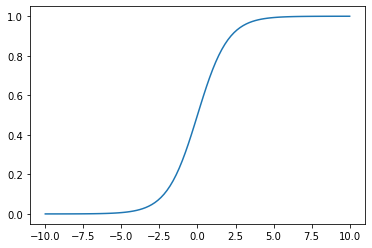

In [234]:
plt.plot(z, probabilities)
plt.show()

Logistic Regression

In [235]:
def eval_model(X, y, iterations, eta=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(iterations):
        z = np.dot(X, W)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        
        dQ = 1/n * X.T @ (y_pred - y)
        W -= eta * dQ
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [236]:
W = eval_model(X_st, y, iterations=500, eta=1e-4)

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
50 [ 0.494784   -0.14564801  0.6475462   1.52014828] 1.1657985749255426
100 [ 0.49290109 -0.15285535  0.64740132  1.51733474] 1.1531112685708473
150 [ 0.49102761 -0.16003088  0.64725118  1.51453281] 1.140535275330502
200 [ 0.48916364 -0.16717404  0.64709581  1.51174267] 1.1280719326917483
250 [ 0.48730929 -0.17428428  0.64693524  1.50896452] 1.1157225565960736
300 [ 0.48546465 -0.18136107  0.64676951  1.50619853] 1.1034884426224387
350 [ 0.48362982 -0.18840385  0.64659868  1.5034449 ] 1.0913708674192037
400 [ 0.48180488 -0.19541206  0.64642281  1.50070383] 1.0793710903721336
450 [ 0.47998993 -0.20238516  0.64624195  1.49797551] 1.0674903554915993


## Домашнее задание <a class='anchor' id='hw'>

__1. *Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.__

Можно добавить маленькое число в скобки, к примеру, 1e-8, так как sigmoid не может вернуть число больше 1.

In [237]:
def calc_logloss(y, y_pred):
    err = - np.mean(y * np.log(y_pred + 1e-8) + (1.0 - y) * np.log(1.0 - y_pred + 1e-8))
    return err

__2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.__

In [238]:
W = eval_model(X_st, y, iterations=100000, eta=1e-2)

0 [ 0.49292028 -0.15277306  0.64741473  1.51736839] 1.1785956513536955
10000 [-2.51859539 -0.94526548  0.40020792  3.13260413] 0.37535102523490693
20000 [-4.27636089 -0.98163197 -0.27404823  4.26190358] 0.32664526547670125
30000 [-5.56029067 -1.03174275 -0.73817187  5.15128174] 0.2999293989226583
40000 [-6.58505076 -1.08569439 -1.09081936  5.8979985 ] 0.28253138713864373
50000 [-7.45452707 -1.13932291 -1.38011056  6.55229421] 0.2698053264880422
60000 [-8.22283088 -1.19149845 -1.62966903  7.1429085 ] 0.25975499570766825
70000 [-8.9205223  -1.24198713 -1.85228427  7.68713321] 0.2513995389325688
80000 [-9.5660847  -1.29082061 -2.05546494  8.19590938] 0.24420398903929302
90000 [-10.17134369  -1.33810265  -2.24391155   8.67648179] 0.2378518264674651


__3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).__

In [239]:
W

array([-10.74417094,  -1.38394305,  -2.42070613,   9.13379901])

In [240]:
def calc_pred_proba(X, y):
    return sigmoid(np.dot(y,X.T))
calc_pred_proba(X_st, W)

array([0.34909577, 0.16500392, 0.99720963, 0.00128205, 0.73111739,
       0.3237184 , 0.99918914, 0.09118778, 0.40771831, 0.99034651])

__4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).__

In [241]:
def calc_pred(W, X, threshold):
    
    y_pred_proba = calc_pred_proba(W, X)
    
    y_pred = [int(p >= threshold) for p in y_pred_proba]
    
    return y_pred

In [242]:
pred = calc_pred(W, X_st, 0.5)
pred

[0, 0, 1, 0, 1, 0, 1, 0, 0, 1]

__5. *Реализуйте функции для подсчета Accuracy, матрицы ошибок, точности и полноты, а также F1 score.__

__Accuracy__

In [243]:
def accuracy(y, y_pred):
    accuracy = np.mean(y == y_pred)
    return accuracy

In [244]:
print(f'True \t  {y}')
print(f'Predicted {pred}')

True 	  [0. 0. 1. 0. 1. 0. 1. 0. 1. 1.]
Predicted [0, 0, 1, 0, 1, 0, 1, 0, 0, 1]


In [245]:
accuracy(y, pred)

0.9

__Матрица ошибок__

In [246]:
#TP   FP

#FN   TN

In [247]:
def confusion_matrix(y, y_pred):
    cm = np.zeros((2, 2))
    for i in range(len(y)): 
        if y[i] == y_pred[i] == 1: # TP
            cm[0][0] += 1
        elif y[i] == y_pred[i] == 0: # TN
            cm[1][1] += 1
        elif y[i] != y_pred[i] and y[i] == 1: # FN
            cm[1][0] += 1
        elif y[i] != y_pred[i] and y[i] == 0: # FP
            cm[0][1] += 1
    return cm

In [248]:
cm = confusion_matrix(y, pred)
cm

array([[4., 0.],
       [1., 5.]])

__Precision__

In [249]:
def precision(y, y_pred):
    cm = confusion_matrix(y, y_pred)
    TP = cm[0][0]
    TN = cm[1][1]
    FP = cm[0][1]
    FN = cm[1][0]
    precision = TP / (TP + FP)
    return precision

In [250]:
precision(y, pred)

1.0

__Recall__

In [251]:
def recall(y, y_pred):
    cm = confusion_matrix(y, y_pred)
    TP = cm[0][0]
    TN = cm[1][1]
    FP = cm[0][1]
    FN = cm[1][0]
    recall = TP / (TP + FN)
    return recall

In [252]:
recall(y, pred)

0.8

In [253]:
def f_score(y, y_pred):
    pr = precision(y, y_pred)
    rec = recall(y, y_pred)
    f_score = 2 * pr * rec / (pr + rec)
    return f_score

In [254]:
f_score(y, pred)

0.888888888888889

__6. Могла ли модель переобучиться? Почему?__

Модель могла переобучиться из-за большого последнего веса. Это случилось по причине малого количества данных.